# Visualize Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## §1 Sensors

head:
   sensor_id       x       y       z
0          0 -256.14 -521.08  496.03
1          1 -256.14 -521.08  479.01
2          2 -256.14 -521.08  461.99
3          3 -256.14 -521.08  444.97
4          4 -256.14 -521.08  427.95


shape:
(5160, 4)


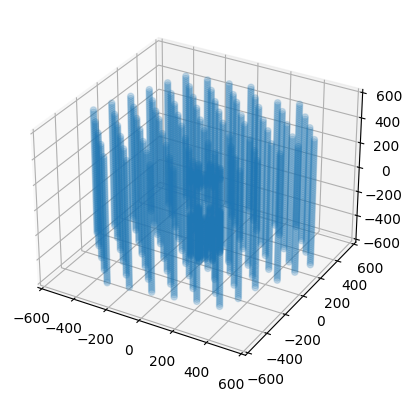

In [2]:
sensor_geo = pd.read_csv('data/sensor_geometry.csv')

print('head:')
print(sensor_geo.head())
print('\n')
#print('tail:')
#print(sensor_geo.tail())
#print('\n')
print('shape:')
print(sensor_geo.shape)

#draw the picture of the 5160 sensors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sensor_geo['x'], sensor_geo['y'], sensor_geo['z'], alpha=0.2)

ax.set_xlim([-600, 600])
ax.set_ylim([-600, 600])
ax.set_zlim([-600, 600])
plt.show()

### §1.1 Azimuthal Distribution

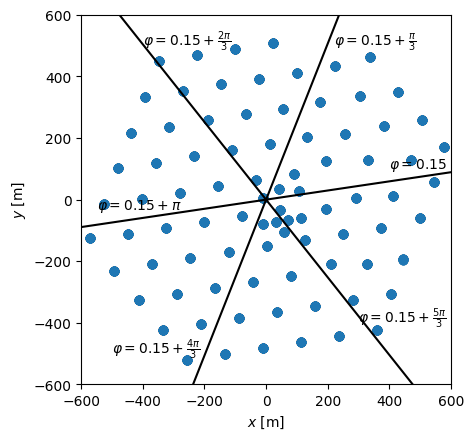

In [4]:
zen_start = 3*2*np.pi/128

fig, ax = plt.subplots()
ax.set_aspect('equal')

plt.scatter(sensor_geo['x'], sensor_geo['y'], alpha=0.2)
for i in range(6):
    plt.plot(np.cos(zen_start+i*np.pi/3) * np.linspace(0,1000,2000), np.sin(zen_start+i*np.pi/3) * np.linspace(0,1000,2000), c='k')

plt.text(400, 100, r"$\varphi=0.15$")
plt.text(220, 500, r"$\varphi=0.15+\frac{\pi}{3}$")
plt.text(-400, 500, r"$\varphi=0.15+\frac{2\pi}{3}$")
plt.text(-550, -30, r"$\varphi=0.15+\pi$")
plt.text(-500, -500, r"$\varphi=0.15+\frac{4\pi}{3}$")
plt.text(300, -400, r"$\varphi=0.15+\frac{5\pi}{3}$")

plt.xlabel(r"$x$"+" [m]")
plt.ylabel(r"$y$"+" [m]")
plt.xlim([-600, 600])
plt.ylim([-600, 600])
plt.show()

In [4]:
def xyz_to_azi_zen(x, y, z):
    azi = np.sign(y) * np.arccos(x / np.sqrt(x**2+y**2))
    zen = np.arccos(z / np.sqrt(x**2+y**2+z**2))
    return azi, zen

sensor_geo['azi'], sensor_geo['zen'] = xyz_to_azi_zen(sensor_geo['x'], sensor_geo['y'], sensor_geo['z'])

print(sensor_geo.head())

   sensor_id       x       y       z       azi       zen
0          0 -256.14 -521.08  496.03 -2.027666  0.863814
1          1 -256.14 -521.08  479.01 -2.027666  0.881007
2          2 -256.14 -521.08  461.99 -2.027666  0.898702
3          3 -256.14 -521.08  444.97 -2.027666  0.916909
4          4 -256.14 -521.08  427.95 -2.027666  0.935639


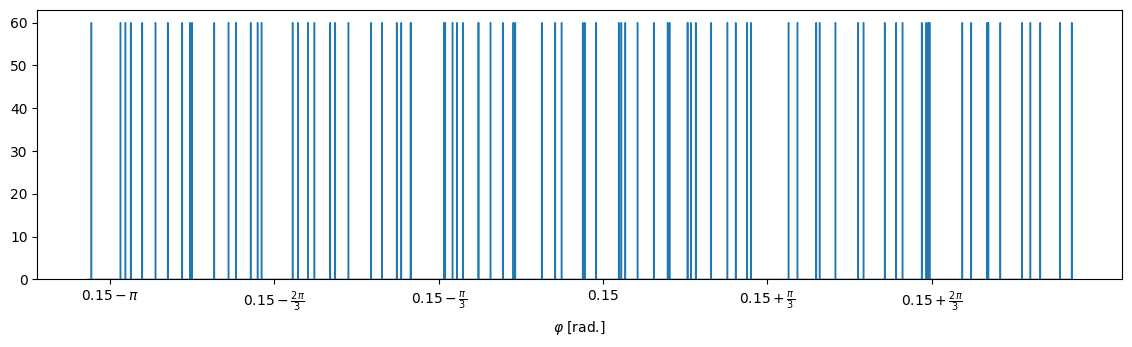

In [5]:
plt.figure(figsize=(14,3.5))
plt.hist(sensor_geo['azi'],bins = np.linspace(-np.pi,np.pi,2000),histtype = 'step')# y is always 60, which is the number of sensors on a string
start = 3*2*np.pi/128 - np.pi
plt.xticks(
    [start,start+np.pi/3,start+2*np.pi/3,start+3*np.pi/3,start+4*np.pi/3,start+5*np.pi/3],
    [r"$0.15-\pi$",r"$0.15-\frac{2\pi}{3}$",r"$0.15-\frac{\pi}{3}$",r"$0.15$",r"$0.15+\frac{\pi}{3}$",r"$0.15+\frac{2\pi}{3}$"]
    #[r"0.15",r"$0.15+\frac{\pi}{3}$",r"$0.15+\frac{2\pi}{3}$",r"$0.15+\pi$",r"$0.15+\frac{4\pi}{3}$",r"$0.15+\frac{5\pi}{3}$"]
)
plt.xlabel(r"$\varphi$"+" [rad.]")
plt.show()

### §1.2 Zenithal Distribution

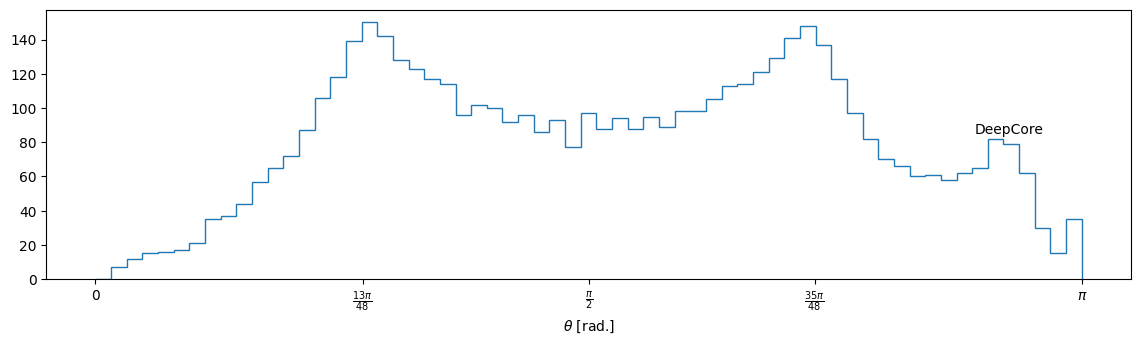

In [6]:
plt.figure(figsize=(14,3.5))
plt.hist(sensor_geo['zen'],bins = np.linspace(0,np.pi,64),histtype = 'step')
plt.text(2.8, 85, 'DeepCore')
plt.xticks([0, 13*np.pi/48, np.pi/2, 35*np.pi/48, np.pi], [r"0", r"$\frac{13\pi}{48}$", r"$\frac{\pi}{2}$", r"$\frac{35\pi}{48}$", r"$\pi$"])
plt.xlabel(r"$\theta$"+" [rad.]")
plt.show()

## §2 Train Dataset

### §2.1 `train_meta.parquet`

In [3]:
train_meta = pd.read_parquet('data/train_meta.parquet')

print('head:')
print(train_meta.head())#(first_pulse_index from line n+1) = (last_pulse_index from line n) + 1
print('\n')
print('tail:')
print(train_meta.tail())
print('\n')
print('shape:')
print(train_meta.shape)
print('\n')

print(train_meta.describe())
print('\n')

print('same batch_id:')#131953924=659*200000+153924, 131953924 events distributed from batch_1 to batch_660 in train folder
value_counts = train_meta['batch_id'].value_counts()
print(value_counts)
print('\n')

#print('same event_id:')#There are 131953924 different events, 131953924=659*200000+153924, 131953924 events distributed from batch_1 to batch_660 in train folder
#value_counts = train_meta['event_id'].value_counts()
#print(value_counts)

head:
   batch_id  event_id  first_pulse_index  last_pulse_index   azimuth    zenith
0         1        24                  0                60  5.029555  2.087498
1         1        41                 61               111  0.417742  1.549686
2         1        59                112               147  1.160466  2.401942
3         1        67                148               289  5.845952  0.759054
4         1        72                290               351  0.653719  0.939117


tail:
           batch_id    event_id  first_pulse_index  last_pulse_index  \
131953919       660  2147483597           24339210          24339349   
131953920       660  2147483603           24339350          24339383   
131953921       660  2147483617           24339384          24339424   
131953922       660  2147483626           24339425          24339499   
131953923       660  2147483627           24339500          24339550   

            azimuth    zenith  
131953919  5.895612  0.333071  
131953920  3.27

#### §2.1.1 Angle distribution of each batch

In [4]:
def plot_angle_for_batch(batch_id):
    train_meta = pd.read_parquet('data/train_meta.parquet')
    train_meta_batch = train_meta[train_meta['batch_id'] == batch_id][['azimuth', 'zenith']]
    azimuth = np.array(train_meta_batch['azimuth'].tolist())
    zenith = np.array(train_meta_batch['zenith'].tolist())
    plt.rcParams['agg.path.chunksize'] = 200# RAM error
    plt.rcParams['path.simplify_threshold'] = 0.2# RAM error
    plt.figure(figsize=(10, 5))
    plt.plot(azimuth, zenith, 'o', markersize=0.3)
    plt.xlabel("Azimuth")
    plt.ylabel("Zenith")
    plt.xlim(0, 2*np.pi)
    plt.ylim(0, np.pi)
    plt.xticks([0, np.pi, 2*np.pi], ["0", r"$\pi$", r"$2 \pi$"])
    plt.yticks([0, np.pi], ["0", r"$\pi$"])

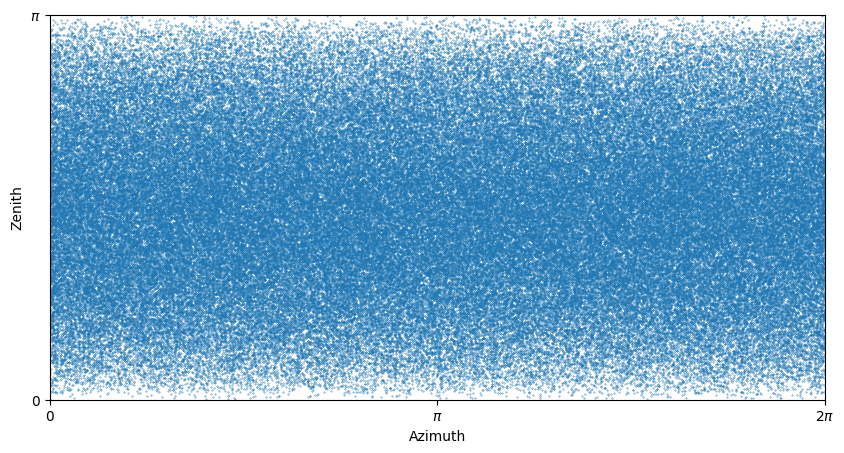

In [5]:
plot_angle_for_batch(batch_id=1)

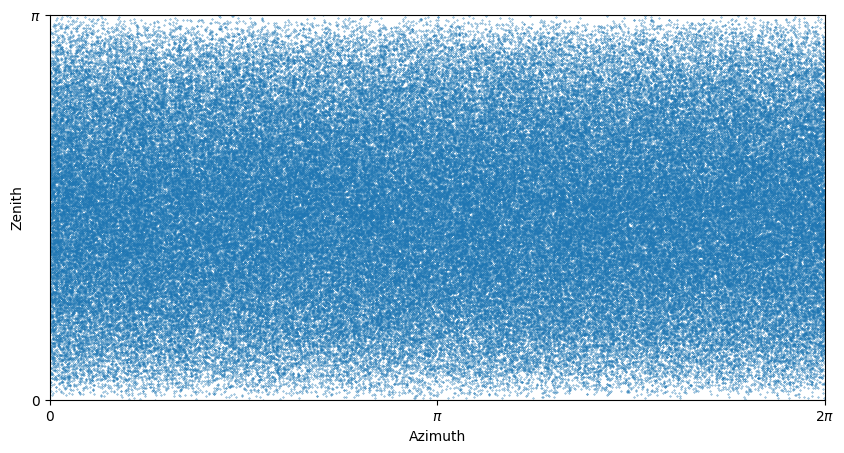

In [6]:
plot_angle_for_batch(batch_id=2)

### §2.2 `train/batch_1.parquet`

In [7]:
train_batch_1 = pd.read_parquet('data/train/batch_1.parquet')

print('head:')
print(train_batch_1.head())
print('\n')
#print('tail:')
#print(train_batch_1.tail())
#print('\n')
print('shape:')
print(train_batch_1.shape)
print('\n')

print('same event_id:')
counts = train_batch_1.index.value_counts()#200000 events in batch_1
print(counts)
print('\n')

print('same sensor_id:')
value_counts = train_batch_1['sensor_id'].value_counts()#only 5051 out of 5160 sensors are used in batch_1
print(value_counts)

head:
          sensor_id  time  charge  auxiliary
event_id                                    
24             3918  5928   1.325       True
24             4157  6115   1.175       True
24             3520  6492   0.925       True
24             5041  6665   0.225       True
24             2948  8054   1.575       True


shape:
(32792416, 4)


same event_id:
event_id
138523     110517
2885852    109891
759693     108737
2097125     98594
2426177     98405
            ...  
650618         17
1553217        17
1317057        16
303580         15
3201121        15
Name: count, Length: 200000, dtype: int64


same sensor_id:
sensor_id
5038    14560
4979    14467
4978    14320
5037    14293
4915    14133
        ...  
1354     1694
2916     1670
3334     1668
1355     1649
3455     1648
Name: count, Length: 5051, dtype: int64


#### 2.2.1 One event in `train/batch_1.parquet`

In [8]:
train_batch_1_event_24 = train_batch_1.loc[24]

print('event_24')
print('head:')
print(train_batch_1_event_24.head())# time should be moment because it's increasing
print('\n')
#print('tail:')
#print(train_batch_1_event_24.tail())
#print('\n')
print('shape:')
print(train_batch_1_event_24.shape)# different event have different shape, meaning the sensor used is different
print('\n')

event_24
head:
          sensor_id  time  charge  auxiliary
event_id                                    
24             3918  5928   1.325       True
24             4157  6115   1.175       True
24             3520  6492   0.925       True
24             5041  6665   0.225       True
24             2948  8054   1.575       True


shape:
(61, 4)




Reproduce a train event in the picture of the total 5160 sensors:

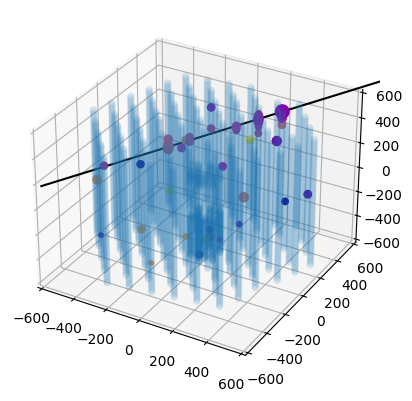

In [9]:
#the first 20 events in batch_1 are: 
#24, 41, 59, 67, 72, 77, 79, 82, 121, 127, 140, 221, 244, 290, 325, 354, 360, 402, 406, 410

event_id = 406#406 looks the best，138523 is detected by about 110,000 sensors

train_batch_1_event = train_batch_1.loc[event_id]

x = []
for i in train_batch_1_event['sensor_id']:
    x.append(sensor_geo[sensor_geo['sensor_id'] == i]['x'])
x = np.array(x)
y = []
for i in train_batch_1_event['sensor_id']:
    y.append(sensor_geo[sensor_geo['sensor_id'] == i]['y'])
y = np.array(y)
z = []
for i in train_batch_1_event['sensor_id']:
    z.append(sensor_geo[sensor_geo['sensor_id'] == i]['z'])
z = np.array(z)

#draw the picture
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#Sensor
ax.scatter(sensor_geo['x'], sensor_geo['y'], sensor_geo['z'], alpha=0.1)

#color represents arrival time, size represents charge:
ax.scatter(x, y, z, c=train_batch_1_event['time'], s=30*train_batch_1_event['charge'], alpha=1, cmap='plasma')

def center_point_max_charge_sensor_id():
    max_charge_row = train_batch_1_event[train_batch_1_event['charge'] == train_batch_1_event['charge'].max()]
    sensor_id_max_charge = max_charge_row['sensor_id'].values[0]
    center_point = np.array([sensor_geo.loc[sensor_id_max_charge]['x'],
                             sensor_geo.loc[sensor_id_max_charge]['y'],
                             sensor_geo.loc[sensor_id_max_charge]['z']
                             ])
    return center_point

center_point = center_point_max_charge_sensor_id()

#plot the line
length = 4000
phi = np.array(train_meta[train_meta['event_id'] == event_id]['azimuth']).item()
theta = np.array(train_meta[train_meta['event_id'] == event_id]['zenith']).item()
x1 = center_point[0] + length/2 * np.sin(theta) * np.cos(phi)
y1 = center_point[1] + length/2 * np.sin(theta) * np.sin(phi)
z1 = center_point[2] + length/2 * np.cos(theta)
x2 = center_point[0] - length/2 * np.sin(theta) * np.cos(phi)
y2 = center_point[1] - length/2 * np.sin(theta) * np.sin(phi)
z2 = center_point[2] - length/2 * np.cos(theta)
ax.plot([x1, x2], [y1, y2], [z1, z2], color='k')

ax.set_xlim([-600, 600])
ax.set_ylim([-600, 600])
ax.set_zlim([-600, 600])
plt.show()

## §3 Test Dataset

### §3.1 `test_meta.parquet`

In [10]:
"""test_meta"""

test_meta = pd.read_parquet('data/test_meta.parquet')#inference event_2092, event_7344, event_9482

print(test_meta.head())
print('\n')
print(test_meta.shape)

   batch_id  event_id  first_pulse_index  last_pulse_index
0       661      2092                  0               298
1       661      7344                299               334
2       661      9482                335               377


(3, 4)


### §3.2 `test/batch_661.parquet`

In [11]:
test_batch_661 = pd.read_parquet('data/test/batch_661.parquet')

print('head:')
print(test_batch_661.head())
print('\n')
print('shape:')
print(test_batch_661.shape)
print('\n')

print('same event_id:')
counts = test_batch_661.index.value_counts()#inference event_2092, event_7344, event_9482
print(counts)
print('\n')

print('event to be inferenced:')
print(train_meta.loc[2092].head())
print(train_meta.loc[7344].head())
print(train_meta.loc[9482].head())
print('\n')

print('2092, azimuth, zenith:')
print(train_meta.loc[2092, 'azimuth'], train_meta.loc[2092, 'zenith'])
print('7344, azimuth, zenith:')
print(train_meta.loc[7344, 'azimuth'], train_meta.loc[7344, 'zenith'])
print('9482, azimuth, zenith:')
print(train_meta.loc[9482, 'azimuth'], train_meta.loc[9482, 'zenith'])

head:
          sensor_id  time  charge  auxiliary
event_id                                    
2092           4066  6170   1.275       True
2092           3512  6374   0.975       True
2092            897  6378   1.475       True
2092           2060  6590   0.925       True
2092           3072  6625   1.075       True


shape:
(378, 4)


same event_id:
event_id
2092    299
9482     43
7344     36
Name: count, dtype: int64


event to be inferenced:
batch_id                  1.0
event_id              32932.0
first_pulse_index    302426.0
last_pulse_index     302522.0
azimuth              1.303108
Name: 2092, dtype: Float64
batch_id                   1.0
event_id              119994.0
first_pulse_index    1169481.0
last_pulse_index     1169530.0
azimuth               4.830316
Name: 7344, dtype: Float64
batch_id                   1.0
event_id              153953.0
first_pulse_index    1616308.0
last_pulse_index     1616389.0
azimuth               4.840953
Name: 9482, dtype: Float64


2092

#### §3.2.1 One event in `test/batch_661.parquet`

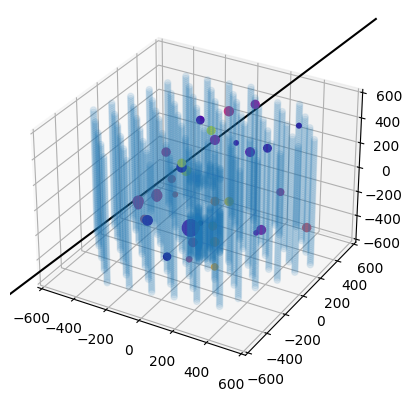

In [12]:
test_batch_661_event = test_batch_661.loc[9482]

x = []
for i in test_batch_661_event['sensor_id']:
    x.append(sensor_geo[sensor_geo['sensor_id'] == i]['x'])
x = np.array(x)
y = []
for i in test_batch_661_event['sensor_id']:
    y.append(sensor_geo[sensor_geo['sensor_id'] == i]['y'])
y = np.array(y)
z = []
for i in test_batch_661_event['sensor_id']:
    z.append(sensor_geo[sensor_geo['sensor_id'] == i]['z'])
z = np.array(z)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#sersor
ax.scatter(sensor_geo['x'], sensor_geo['y'], sensor_geo['z'], alpha=0.1)

#data, color represents arrival time, size represents charge:
ax.scatter(x, y, z, c=test_batch_661_event['time'], s=30*test_batch_661_event['charge'], alpha=1, cmap='plasma')

center_point = [0, 0, 300]# The center point is choosed by eyes

"""
Prediction of IceMix:

event_id  azimuth    zenith
2092      6.1187310  1.3340173
7344      3.4305866  2.4962285
9482      4.6847086  1.5429969
"""

length = 4000
phi = 4.6847086
theta = 1.5429969
x1 = center_point[0] + length/2 * np.sin(theta) * np.cos(phi)
y1 = center_point[1] + length/2 * np.sin(theta) * np.sin(phi)
z1 = center_point[2] + length/2 * np.cos(theta)
x2 = center_point[0] - length/2 * np.sin(theta) * np.cos(phi)
y2 = center_point[1] - length/2 * np.sin(theta) * np.sin(phi)
z2 = center_point[2] - length/2 * np.cos(theta)
ax.plot([x1, x2], [y1, y2], [z1, z2], color='k')

ax.set_xlim([-600, 600])
ax.set_ylim([-600, 600])
ax.set_zlim([-600, 600])
plt.show()

### §3.3 `sample_submission.parquet`

In [13]:
sample_submission = pd.read_parquet('data/sample_submission.parquet')

print(sample_submission.head())
print('\n')
print(sample_submission.shape)

   event_id  azimuth  zenith
0      2092        1       1
1      7344        1       1
2      9482        1       1


(3, 3)
